## **Pima Indians Diabetes Classification**

### 목표: 다양한 특성에 따라 환자가 당뇨병에 취약한지를 분류/예측
**데이터 셋 기술**
* (Pregnancies): 임신한 횟수
* (Glucose): 경구 글루코스 내성 실험에서 2시간 후의 혈장 글루코스 농도
* (BloodPressure): 이완기 혈압 (mm Hg)
* (SkinThickness): 삼두근 피부 주름 두께 (mm)
* (Insulin): 2시간 혈청 인슐린 (mu U/ml)
* BMI: 체질량 지수 (체중(kg) / (신장(m))^2)
* (DiabetesPedigreeFunction): 당뇨병 혈통 기능
* (Age): 나이 (세)
* (Outcome): 클래스 변수 (0 또는 1), 768 중 268은 1이고 나머지는 0입니다.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
%pwd

'c:\\Users\\bluecom001\\Desktop\\module_project2'

In [3]:
data = pd.read_csv('./data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Null이 없는 clean dataset

In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

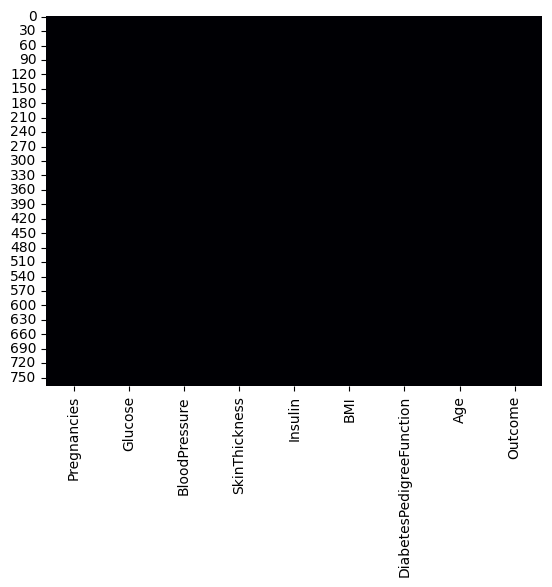

In [6]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


**수치형과 범주형으로 Feature분리하기**

In [9]:
cols = data.columns
categoricals, numericals = [],[]

for col in cols:
    if len(data[col].unique()) > 6 :
        numericals.append(col)
    else:
        categoricals.append(col)

print('Categorical Features :',*categoricals)
print('Numerical Features :',*numericals)


Categorical Features : Outcome
Numerical Features : Pregnancies Glucose BloodPressure SkinThickness Insulin BMI DiabetesPedigreeFunction Age


In [10]:
#%pip install -U scikit-learn

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

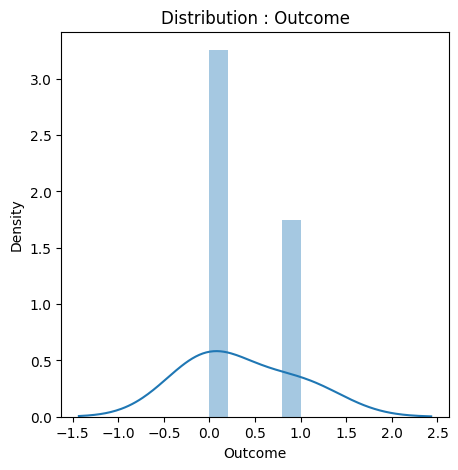

In [12]:
plt.figure(figsize = (5,5))
sns.distplot(data[categoricals[0]],kde_kws = {'bw' : 1});
title = 'Distribution : ' + categoricals[0]
plt.title(title);

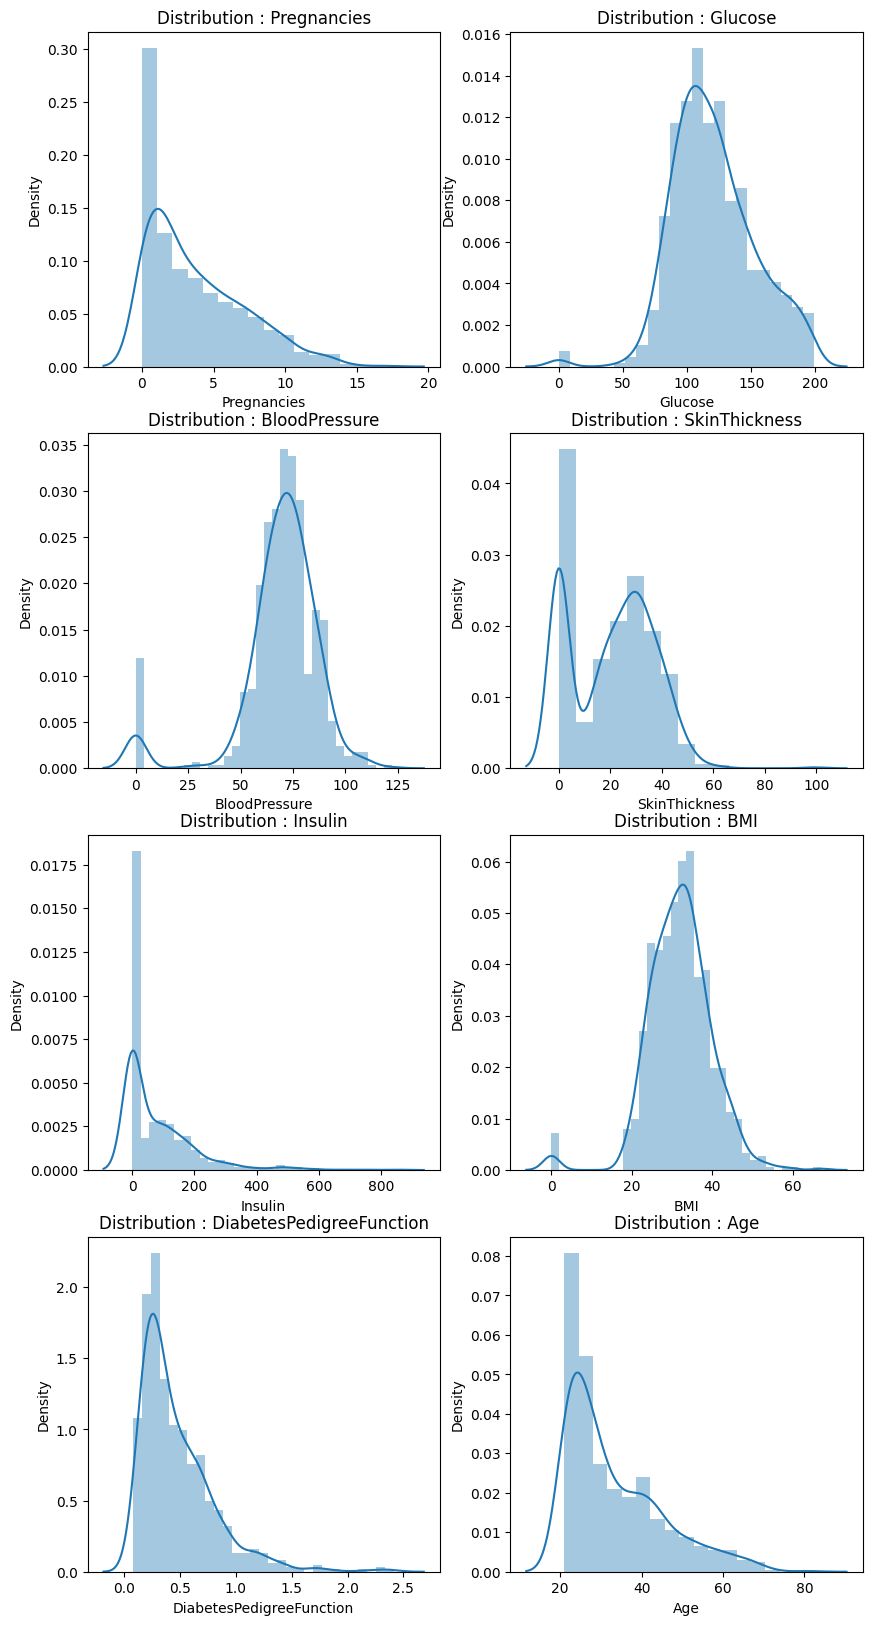

In [13]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (10,20))
for i in range(len(numericals)):
    plt.subplot(4,2,i+1)
    sns.distplot(data[numericals[i]])
    title = 'Distribution : ' + numericals[i]
    plt.title(title)
plt.show()

In [14]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


In [15]:
# %pip install --upgrade scikit-learn

In [16]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1 = data.copy(deep = True)
# df1.drop(columns = ['Glucose_Group','Insulin_Group','BMI_Group','DiabetesPedigreeFunction_Group'],inplace = True)

df1['Pregnancies'] = mms.fit_transform(df1[['Pregnancies']])
df1['Insulin'] = ss.fit_transform(df1[['Insulin']])
df1['DiabetesPedigreeFunction'] = ss.fit_transform(df1[['DiabetesPedigreeFunction']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['BloodPressure'] = ss.fit_transform(df1[['BloodPressure']])
df1['SkinThickness'] = ss.fit_transform(df1[['SkinThickness']])
df1['Glucose'] = ss.fit_transform(df1[['Glucose']])
df1['BMI'] = ss.fit_transform(df1[['BMI']])
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.35,0.85,0.15,0.91,-0.69,0.20,0.47,1.43,1
1,0.06,-1.12,-0.16,0.53,-0.69,-0.68,-0.37,-0.19,0
2,0.47,1.94,-0.26,-1.29,-0.69,-1.10,0.60,-0.11,1
3,0.06,-1.00,-0.16,0.15,0.12,-0.49,-0.92,-1.04,0
4,0.00,0.50,-1.50,0.91,0.77,1.41,5.48,-0.02,1


### Correlation Matrix

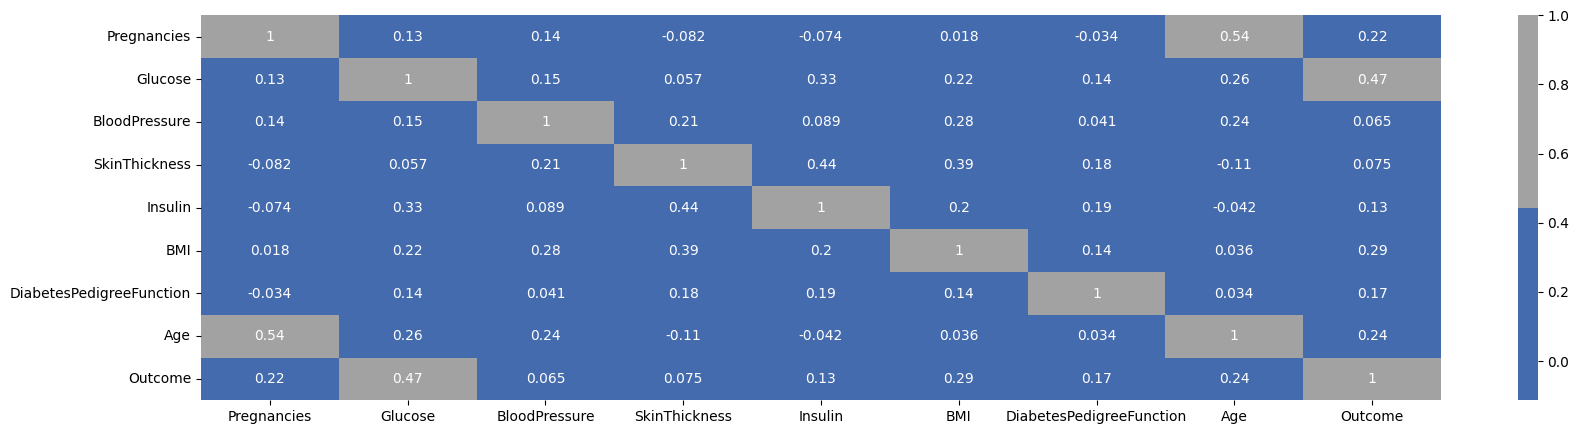

In [18]:
colors = ['#446BAD','#A2A2A2']

plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

* 피부 두께와 혈압은 각각 0.075, 0.065로 상관계수가 매우 낮습니다
* Glucose는 가장 높은 상관계수를 보였고, BMI, 나이, 임신여부, 인슐린 순으로 나타났습니다. 


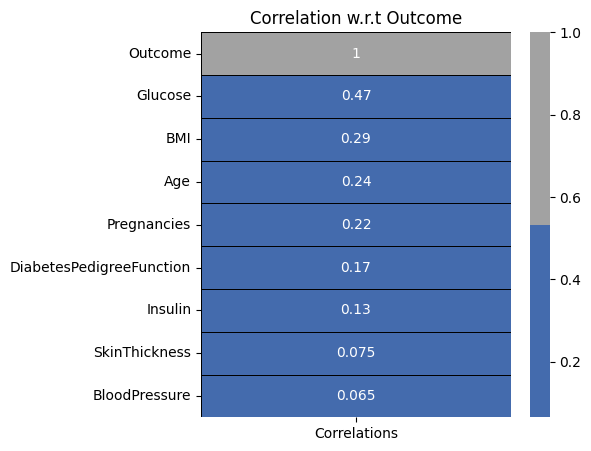

In [19]:
corr = df1.corrwith(df1['Outcome']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

수치형 데이터 feature selection

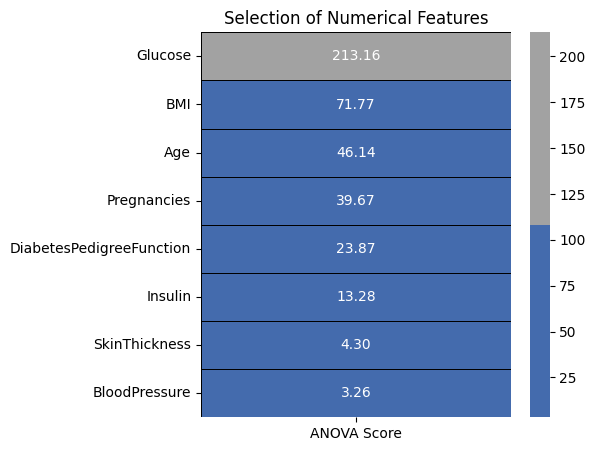

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

features = df1.loc[:,numericals]
target = df1.loc[:,categoricals]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [22]:
df1.drop(columns = ['SkinThickness','BloodPressure'],inplace = True)
f1 = df1.iloc[:,:6].values
t1 = df1.iloc[:,6].values

df2 = df1.copy(deep = True)
df2.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.35,0.85,-0.69,0.20,0.47,1.43,1
1,0.06,-1.12,-0.69,-0.68,-0.37,-0.19,0
2,0.47,1.94,-0.69,-1.10,0.60,-0.11,1
3,0.06,-1.00,0.12,-0.49,-0.92,-1.04,0
4,0.00,0.50,0.77,1.41,5.48,-0.02,1


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.25, random_state = 2) # Unbalanced
# x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.25, random_state = 2) # Balanced

In [26]:
import pickle

# x_train 저장
with open('x_train.pkl', 'wb') as f:
    pickle.dump(x_train, f)

# x_test 저장
with open('x_test.pkl', 'wb') as f:
    pickle.dump(x_test, f)

# y_train 저장
with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

# y_test 저장
with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)
